In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
R = open('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Practica_computacional\mag_papers_160.txt', 'r') 
N = 999999
i = 0
doctype=[]
paper_conjuntos = []

# Con esta primera línea nos aseguramos de que los documentos que vamos a trabajar sean exclusivamente papers.

for line in R:
    paper=ast.literal_eval(line)
    try:
        doctype.append(paper['doc_type'])
        if paper['doc_type']=='Journal':
            paper_conjuntos.append(paper)
    except KeyError:
        pass
    i+=1
    if i==N:
        break
R.close()

paper_conjuntos_1 = []

# Con este código nos restringimos solo a aquellos papers que tienen keywords.

for line in range(len(paper_conjuntos)):
    #paper=ast.literal_eval(line)
    try:
        paper_conjuntos[line]['fos']
        paper_conjuntos_1.append(paper_conjuntos[line])
    except KeyError:
        pass
        
    i+=1
    if i==N:
        break

paper_conjuntos_2 = []

# Con esta línea nos restringimos a aquellos papers que tienen referencias.

for line in range(len(paper_conjuntos_1)):
    #paper=ast.literal_eval(line)
    try:
        paper_conjuntos[line]['references']
        paper_conjuntos_2.append(paper_conjuntos_1[line])
    except KeyError:
        pass
        
    i+=1
    if i==N:
        break        

# Esta última parte hace un raconto de las revistas para después hacer análisis de frecuencias.

journals=[]

for line in range(len(paper_conjuntos_2)):
    try:
        b=paper_conjuntos_2[line]['venue']
        journals.append(b)
    except KeyError:
        pass
    i+=1
    if i==N:
        break      
        
# Lo que podríamos hacer es restringirnos a aquellos papers que tienen dos, tres, cuatro, etc., citas. 
# Esto supone hacer un conteo de los id's y dejar solamente aquellos que tienen un id duplicado.
# Hay que armar una lista de ids, tomando tanto el id de cada paper como los ids de las referencias.

In [3]:
ides=[]

for line in range(len(paper_conjuntos_2)):
    try:
        b=paper_conjuntos_2[line]['id']
        ides.append(b)
        a=paper_conjuntos_2[line]['references']
        for tag in range(len(a)):
            ides.append(a[tag])
    except KeyError:
        pass
    i+=1
    if i==N:
        break 

In [4]:
print(len(ides))

2885176


In [5]:
import collections
counter=collections.Counter(ides)

In [6]:
(keys,values) = zip(*counter.items())

In [7]:
ides_limpios = []
for line in range(len(values)):
    if values[line]>1:
        ides_limpios.append(keys[line])

In [8]:
print(len(ides_limpios))

288849


In [10]:
paper_conjuntos_3 = []

# Con esta línea nos restringimos a aquellos papers que tienen referencias.

for line in range(len(paper_conjuntos_2)):
    #paper=ast.literal_eval(line)
    a=paper_conjuntos_2[line]['id']
    if a in ides_limpios:
        paper_conjuntos_3.append(paper_conjuntos_2[line])
  
    #i+=1
    #if i==N:
     #   break    

In [1]:
paper_conjuntos_4 = paper_conjuntos_3.copy() #aca hay que crear una copia con el comando copy

# Con esta línea nos restringimos a aquellos papers que tienen referencias que aparecen más de una vez en el archivo general.
for line in range(len(paper_conjuntos_4)):
    try:
        l1 = list(set(paper_conjuntos_4[line]['references']).intersection(ides_limpios))
        paper_conjuntos_4[line]['references']=l1
    except KeyError:
        pass
    i+=1
    if i==N:
        break

NameError: name 'paper_conjuntos_3' is not defined

In [11]:
len(paper_conjuntos_3)

6623

In [63]:
# Esto es para crear la red de citas. No tarda mucho en correr.

N = 20000
i = 0
G = nx.DiGraph() # Red Dirigida
for line in range(len(paper_conjuntos_4)):
    try:
        for cita in paper_conjuntos_4[line]['references']:                                                                                                                                                                                                                                                                                                                                                                       
            G.add_edge(paper_conjuntos_4[line]['id'],cita)
    except KeyError:
        G.add_node(paper_conjuntos_4[line]['id'])
    #nx.set_node_attributes(G, 'year', {paper['id']:paper['year']})
    nx.set_node_attributes(G, {paper_conjuntos_4[line]['id']:{'year':paper_conjuntos_4[line]['year']}})
    i+=1
    if i==N:
        break

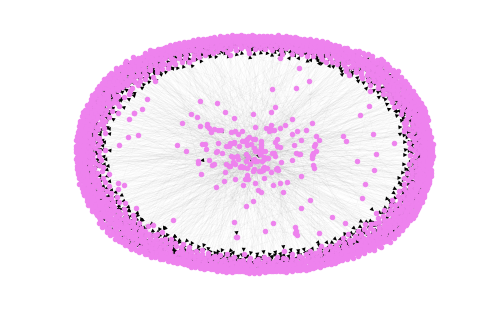

In [64]:
# Esto es obviamente para graficar la red. Cuidado porque tarda una banda.

options = {
'node_size': 20,
'width': 0.01,
}
nx.draw(G,node_color = 'violet', **options)
plt.show()

In [25]:
len(paper_conjuntos_3)

154

C:\Users\Emanuel\Anaconda3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


MemoryError: 

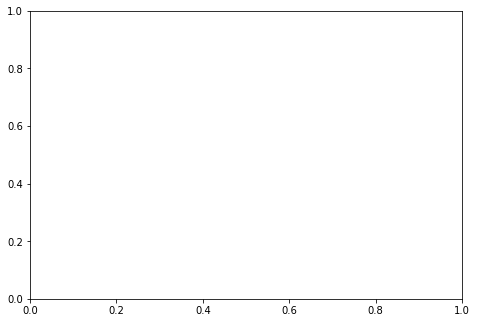

In [14]:
options = {
'node_size': 20,
'width': 0.1,
}
nx.draw(G,node_color = 'violet', **options)
plt.show()

In [13]:
l2=l1.copy()

In [14]:
print(l2)

[1, 3, 4]


In [11]:
l2

<function list.copy>

In [12]:
l1

[1, 3, 4]

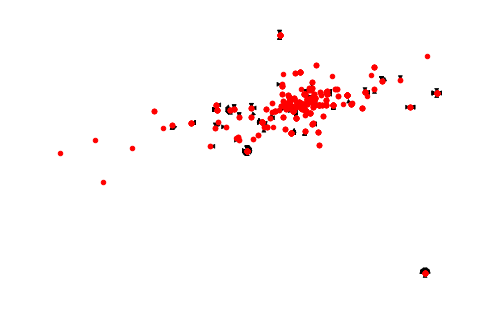

In [24]:
options = {
'node_size': 20,
'width': 0.6,
}
nx.draw_spectral(G, **options)
plt.show()